# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

**Project Description**

In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.


## Install `Tensorflow2.0` 

In [2]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


## Get Required Files from Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os

project_path =  '/content/drive/My Drive/data/'
os.chdir(project_path)

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [0]:
import pandas as pd
import numpy as np

Data=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

In [7]:
Data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
Data.shape

(26709, 3)

It has three columns, 26709 data sets.

The columns are, 

article_link :  Seems to have location of the article

headline : A brief info on the article

is_sarcatstic : our target column - whether the data is sarcastic or not

In [9]:
Data.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


Seems to have no missing data

In [11]:
Data.iloc[10]

article_link    https://www.huffingtonpost.com/entry/airline-p...
headline        airline passengers tackle man who rushes cockp...
is_sarcastic                                                    0
Name: 10, dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


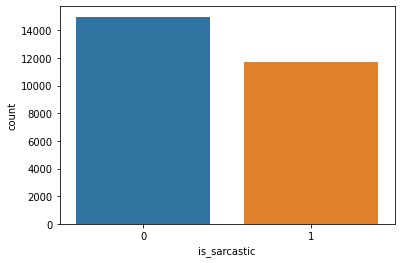

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(Data['is_sarcastic'])

Seems not much of bias in the dataset target

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [0]:
Data1=Data.drop(['article_link'],axis=1).copy()

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [14]:
Data1.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [15]:
Data1['length']=np.zeros(Data1.shape[0])
for i in range(0,Data1.shape[0]):
  Data1['length'][i]=len(Data1['headline'][i].split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
Data1.iloc[2]

headline        mom starting to fear son's web series closest ...
is_sarcastic                                                    1
length                                                         14
Name: 2, dtype: object

In [17]:
lenmax=Data1.length.max()
lenmax

39.0

In [18]:
Data1.length.argmax()

15247

In [19]:
Data1.iloc[Data1.length.argmax()]['headline']

'elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old'

thus on counting. Length seems to be correct

lets also check with the min length dataset

In [20]:
Data1.length.min()

2.0

In [21]:
Data1.iloc[Data1.length.argmin()]['headline'].split()

['breaking', 'uniform']

#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = int(lenmax)
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
Data1['headline'] = Data1['headline'].apply(lambda x: x.lower())
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(Data1['headline'])


In [0]:
df=Data1.copy()

# Define X and y for your model.

In [26]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [0]:
num_words=len(tokenizer.word_index)+1

In [28]:
num_words

29657

1 is added to len(tokenizer.word_index), as embeddign matrix starts with index 1, the to total number of words in tokernizer is 29656

In [29]:
list(tokenizer.word_index)[num_words-2]

'foodie'

In [30]:
list(tokenizer.word_index)[-1]

'foodie'

In [31]:
list(tokenizer.word_index)[29653:]

['hikes', 'gourmet', 'foodie']

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [33]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
model = Sequential()
### Embedding layer for hint 
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Dropout(0.2))
### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True,recurrent_dropout=0.3)))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931400   
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dense (Dense)                (None, None, 50)          12850     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          510       
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 10)          0

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [37]:
batch_size = 100
epochs = 5

model.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 100s 5ms/sample - loss: 0.5050 - acc: 0.7579 - val_loss: 0.3707 - val_acc: 0.8376
Epoch 2/5
21367/21367 [==============================] - 97s 5ms/sample - loss: 0.3367 - acc: 0.8677 - val_loss: 0.3309 - val_acc: 0.8586
Epoch 3/5
21367/21367 [==============================] - 96s 5ms/sample - loss: 0.2656 - acc: 0.8994 - val_loss: 0.3538 - val_acc: 0.8644
Epoch 4/5
21367/21367 [==============================] - 96s 5ms/sample - loss: 0.2131 - acc: 0.9226 - val_loss: 0.3413 - val_acc: 0.8664
Epoch 5/5
21367/21367 [==============================] - 96s 5ms/sample - loss: 0.1765 - acc: 0.9373 - val_loss: 0.3683 - val_acc: 0.8611


In [40]:
y[5]

0

In [41]:
model.predict(X[5])[-1]

array([[0.28730622]], dtype=float32)

# **The Dataset given in project description PDF(as referance) and the one given by link in this notebook at start were different. Above I have used the dataset available in the drive provided in this notebook,**

Following is the dataset from link available in project description PDF

In [0]:
Data2=pd.read_json('Sarcasm_Headlines_Dataset_pdf.json',lines=True)

In [43]:
j=0
for i in Data['headline']:
  if i in Data2['headline']:
    j=j+1
print("common data between two datasets:",j)

common data between two datasets: 0


This shows dataset are different

In [44]:
Data2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [45]:
Data2.shape

(28619, 3)

This dataset has three columns, 28619 data sets.

The columns are, 

article_link :  Seems to have location of the article

headline : A brief info on the article

is_sarcatstic : our target column - whether the data is sarcastic or not

In [46]:
Data2.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [47]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


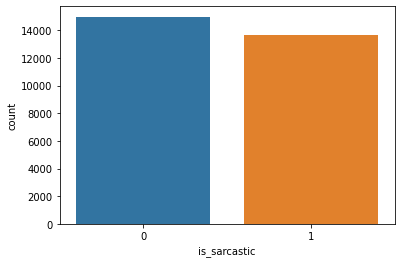

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(Data2['is_sarcastic'])

Seems to have no missing data

In [49]:
Data2.iloc[10]

is_sarcastic                                                    0
headline        this lesbian is considered a father in indiana...
article_link    https://www.huffingtonpost.com/entry/this-lesb...
Name: 10, dtype: object

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [0]:
Data12=Data2.drop(['article_link'],axis=1).copy()

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [51]:
Data12.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [52]:
Data12['length']=np.zeros(Data12.shape[0])
for i in range(0,Data12.shape[0]):
  Data12['length'][i]=len(Data12['headline'][i].split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
Data12.iloc[2]

is_sarcastic                                                    0
headline        eat your veggies: 9 deliciously different recipes
length                                                          7
Name: 2, dtype: object

In [54]:
lenmax=Data12.length.max()
lenmax

151.0

In [55]:
Data12.length.argmax()

7302

In [56]:
Data12.iloc[Data12.length.argmax()]['headline']

'hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet'

thus on counting. Length seems to be correct

lets also check with the min length dataset

In [57]:
Data12.length.min()

2.0

In [58]:
Data12.iloc[Data12.length.argmin()]['headline'].split()

["trump's", 'tailspin']

#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = int(lenmax)
embedding_size = 200

In [60]:
maxlen

151

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
Data12['headline'] = Data12['headline'].apply(lambda x: x.lower())
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(Data12['headline'])


In [0]:
df1=Data12.copy()

# Define X and y for your model.

In [63]:
X1 = tokenizer.texts_to_sequences(df1['headline'])
X1 = pad_sequences(X1, maxlen = maxlen)
y1 = np.asarray(df1['is_sarcastic'])

print("Number of Samples:", len(X1))
print(X1[0])
print("Number of Labels: ", len(y1))
print(y1[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  354 3166 7473 2643    2  660 1118]
Number of Labels:  28619
1


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [0]:
num_words=len(tokenizer.word_index)+1

In [65]:
num_words

30885

1 is added to len(tokenizer.word_index), as embeddign matrix starts with index 1, the to total number of words in tokernizer is 29656

In [66]:
list(tokenizer.word_index)[num_words-2]

'orbiting'

In [67]:
list(tokenizer.word_index)[-1]

'orbiting'

In [68]:
list(tokenizer.word_index)[30882:]

['hashasha', 'orbiting']

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [70]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
model1 = Sequential()
### Embedding layer for hint 
model1.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model1.add(Dropout(0.2))
### Bidirectional LSTM layer for hint 
model1.add(Bidirectional(LSTM(128, return_sequences = True,recurrent_dropout=0.3)))
model1.add(Dense(50,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(10,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [73]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         6177000   
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         336896    
_________________________________________________________________
dense_3 (Dense)              (None, None, 50)          12850     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 10)          510       
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 10)         

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [74]:
batch_size = 100
epochs = 5

model1.fit(X1,y1,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 22895 samples, validate on 5724 samples
Epoch 1/5
22895/22895 [==============================] - 360s 16ms/sample - loss: 0.6381 - acc: 0.5993 - val_loss: 0.3789 - val_acc: 0.8370
Epoch 2/5
22895/22895 [==============================] - 360s 16ms/sample - loss: 0.3391 - acc: 0.8699 - val_loss: 0.3445 - val_acc: 0.8549
Epoch 3/5
22895/22895 [==============================] - 364s 16ms/sample - loss: 0.2297 - acc: 0.9160 - val_loss: 0.3774 - val_acc: 0.8585
Epoch 4/5
22895/22895 [==============================] - 365s 16ms/sample - loss: 0.1674 - acc: 0.9393 - val_loss: 0.3944 - val_acc: 0.8571
Epoch 5/5
22895/22895 [==============================] - 367s 16ms/sample - loss: 0.1245 - acc: 0.9558 - val_loss: 0.4745 - val_acc: 0.8500


In [75]:
y1[1]

0

In [76]:
model1.predict(X1[1])[-1]

array([[0.00523223]], dtype=float32)

In [77]:
y1[3]

1

In [78]:
model1.predict(X1[3])[-1]

array([[0.9047773]], dtype=float32)

Now we have two models and 2 different dataset. Lets test each model on the other dataset as test set


**model** is trained on X , y (Data available in this notebook link)

**model1** is trained on X1 , y1 (Data available in project description PDF link)


Accuracy for "model" on trained data ( trained on notebook dataset)

In [0]:
p=model.evaluate(X,y)

In [83]:
print('Loss:',p[0],'  accuracy',p[1])

Loss: 0.15126765534025652   accuracy 0.94477576


Evaluation of "model" on another dataset (PDF dataset)

In [0]:
tokenizer1 = Tokenizer(num_words=max_features, split=' ')
tokenizer1.fit_on_texts(Data1['headline'])

In [0]:
X3 = tokenizer1.texts_to_sequences(Data12['headline'])
X3 = pad_sequences(X3, maxlen =151)
y3 = np.asarray(Data12['is_sarcastic'])

In [0]:
p1=model.evaluate(X3,y3)

In [82]:
print('Loss:',p1[0],'  accuracy',p1[1])

Loss: 0.23669656028791378   accuracy 0.90787387


Accuracy for "model1" on trained data ( trained on pdf dataset)

In [0]:
p2=model1.evaluate(X1,y1)

In [85]:
print('Loss:',p2[0],'  accuracy',p2[1])

Loss: 0.1489391909506949   accuracy 0.950219


Evaluation of "model1" on another dataset (Notebook dataset)

In [0]:
tokenizer2 = Tokenizer(num_words=max_features, split=' ')
tokenizer2.fit_on_texts(Data12['headline'])

In [0]:
X4 = tokenizer2.texts_to_sequences(Data1['headline'])
X4 = pad_sequences(X4, maxlen =151)
y4 = np.asarray(Data1['is_sarcastic'])

In [0]:
p3=model1.evaluate(X4,y4)

In [89]:
print('Loss:',p3[0],'  accuracy',p3[1])

Loss: 0.14979552842693097   accuracy 0.950876


# Summary

Two models were built on two different dataset one from the link given in this notebook and another from the link in project description PDF

**Model built on dataset from the given notebook** 
Max length in a data : 39, Vocablary size: 29656

Training accuacy : 93.7

Validation accuray : 86.1

accuracy on testing different dataset : 90.7

**while Model built on dataset from the pdf description **
Max length in a data : 151, Vocablary size: 30884

Training accuracy : 95.5

Validation accuracy :85

accuracy on testing different dataset : 95.08


Test accuracy on different dataset is good. Model trained on one dataset seems to perform good on another. Model trained on the data from PDF seems to perform better than the model trained on this notebook data 95.05 against 90.7 on alternate datasets.